<a href="https://colab.research.google.com/github/BaberFaisal/CodeAlpha_Project_Data-Preprocessing-and-Feature-Engineering-for-Equipment-Failure-Prediction./blob/main/Data_Preprocessing_and_Feature_Engineering_for_Equipment_Failure_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [47]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, LabelEncoder, PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel
from imblearn.over_sampling import SMOTE

In [48]:
df = pd.read_csv("/content/ai4i2020.csv")

In [49]:
df.head()

,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF
0,1,M14860,M,298.1,308.6,1551,42.8,0,0,0,0,0,0,0
1,2,L47181,L,298.2,308.7,1408,46.3,3,0,0,0,0,0,0
2,3,L47182,L,298.1,308.5,1498,49.4,5,0,0,0,0,0,0
3,4,L47183,L,298.2,308.6,1433,39.5,7,0,0,0,0,0,0
4,5,L47184,L,298.2,308.7,1408,40.0,9,0,0,0,0,0,0


In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   UDI                      10000 non-null  int64  
 1   Product ID               10000 non-null  object 
 2   Type                     10000 non-null  object 
 3   Air temperature [K]      10000 non-null  float64
 4   Process temperature [K]  10000 non-null  float64
 5   Rotational speed [rpm]   10000 non-null  int64  
 6   Torque [Nm]              10000 non-null  float64
 7   Tool wear [min]          10000 non-null  int64  
 8   Machine failure          10000 non-null  int64  
 9   TWF                      10000 non-null  int64  
 10  HDF                      10000 non-null  int64  
 11  PWF                      10000 non-null  int64  
 12  OSF                      10000 non-null  int64  
 13  RNF                      10000 non-null  int64  
dtypes: float64(3), int64(9)

In [51]:
df.describe()

,UDI,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF
count,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000
mean,5000.50000,300.004930,310.005560,1538.776100,39.986910,107.951000,0.033900,0.004600,0.011500,0.009500,0.009800,0.00190
std,2886.89568,2.000259,1.483734,179.284096,9.968934,63.654147,0.180981,0.067671,0.106625,0.097009,0.098514,0.04355
min,1.00000,295.300000,305.700000,1168.000000,3.800000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
25%,2500.75000,298.300000,308.800000,1423.000000,33.200000,53.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
50%,5000.50000,300.100000,310.100000,1503.000000,40.100000,108.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
75%,7500.25000,301.500000,311.100000,1612.000000,46.800000,162.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
max,10000.00000,304.500000,313.800000,2886.000000,76.600000,253.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000


In [52]:
df.isnull().sum()

,0
UDI,0
Product ID,0
Type,0
Air temperature [K],0
Process temperature [K],0
Rotational speed [rpm],0
Torque [Nm],0
Tool wear [min],0
Machine failure,0
TWF,0


In [53]:
df.duplicated().sum()

0

In [54]:
# Drop irrelevant columns
df = df.drop(columns=["UDI", "Product ID"])


In [55]:
# Encode categorical variable 'Type'
label_encoder = LabelEncoder()
df["Type"] = label_encoder.fit_transform(df["Type"])
df["Type"]

,Type
0,2
1,1
2,1
3,1
4,1
...,...
9995,2
9996,0
9997,2
9998,0


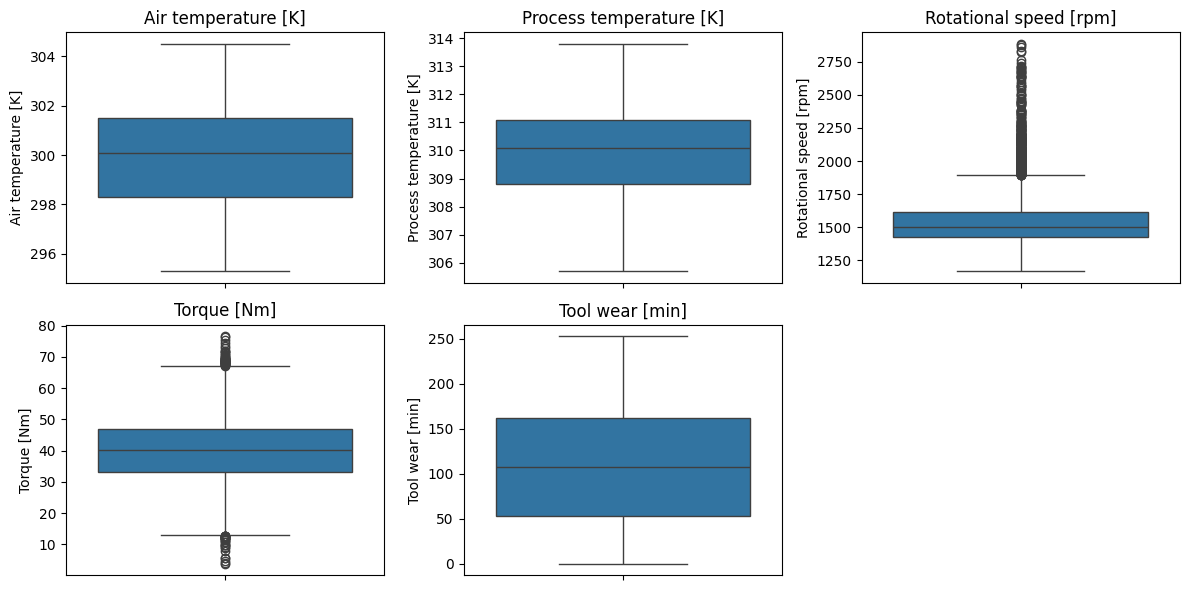

In [56]:
# Plot boxplots for numerical features to identify outliers
numerical_features = [
    "Air temperature [K]", "Process temperature [K]", "Rotational speed [rpm]",
    "Torque [Nm]", "Tool wear [min]"
]

plt.figure(figsize=(12, 6))
for i, col in enumerate(numerical_features, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(y=df[col])
    plt.title(col)

plt.tight_layout()
plt.show()


In [57]:
# Function to remove outliers using IQR method
def remove_outliers_iqr(df, columns):
    for col in columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]
    return df

# Removing outliers
df_cleaned = remove_outliers_iqr(df, numerical_features)

# Display the new shape of the dataset after outlier removal
df_cleaned.shape


(9535, 12)

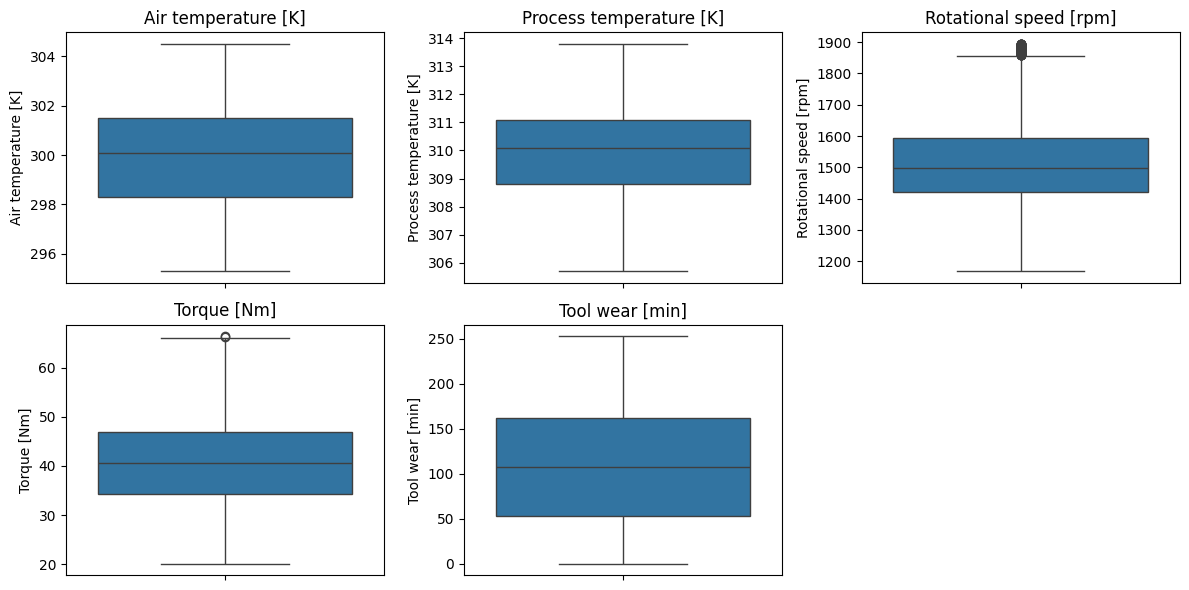

In [58]:
# Plot boxplots for numerical features to identify outliers
numerical_features = [
    "Air temperature [K]", "Process temperature [K]", "Rotational speed [rpm]",
    "Torque [Nm]", "Tool wear [min]"
]

plt.figure(figsize=(12, 6))
for i, col in enumerate(numerical_features, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(y=df_cleaned[col])
    plt.title(col)

plt.tight_layout()
plt.show()


In [59]:
# Normalize numerical features
scaler = StandardScaler()
df[numerical_features] = scaler.fit_transform(df[numerical_features])
df[numerical_features]


,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min]
0,-0.952389,-0.947360,0.068185,0.282200,-1.695984
1,-0.902393,-0.879959,-0.729472,0.633308,-1.648852
2,-0.952389,-1.014761,-0.227450,0.944290,-1.617430
3,-0.902393,-0.947360,-0.590021,-0.048845,-1.586009
4,-0.902393,-0.879959,-0.729472,0.001313,-1.554588
...,...,...,...,...,...
9995,-0.602417,-1.082162,0.363820,-1.052012,-1.476034
9996,-0.552421,-1.082162,0.520005,-0.821283,-1.428902
9997,-0.502425,-0.947360,0.592519,-0.660777,-1.350349
9998,-0.502425,-0.879959,-0.729472,0.854005,-1.303217


In [60]:
# Feature Engineering: Creating rolling mean of torque
df['Torque_rolling_mean'] = df['Torque [Nm]'].rolling(window=5, min_periods=1).mean()
df['Torque_rolling_std'] = df['Torque [Nm]'].rolling(window=5, min_periods=1).std()
df[['Torque_rolling_mean','Torque_rolling_std']]


,Torque_rolling_mean,Torque_rolling_std
0,0.282200,NaN
1,0.457754,0.248271
2,0.619932,0.331248
3,0.452738,0.430077
4,0.362453,0.423652
...,...,...
9995,-0.600587,0.902571
9996,-0.486226,0.808362
9997,-0.602593,0.776317
9998,-0.578517,0.828247


In [61]:
# Polynomial Features
poly = PolynomialFeatures(degree=2, interaction_only=True, include_bias=False)
poly_features = poly.fit_transform(df[numerical_features])
poly_feature_names = poly.get_feature_names_out(numerical_features)
df_poly = pd.DataFrame(poly_features, columns=poly_feature_names)
df = df.merge(df_poly, left_index=True, right_index=True, suffixes=('', '_poly'))
df


,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,...,Air temperature [K] Process temperature [K],Air temperature [K] Rotational speed [rpm],Air temperature [K] Torque [Nm],Air temperature [K] Tool wear [min],Process temperature [K] Rotational speed [rpm],Process temperature [K] Torque [Nm],Process temperature [K] Tool wear [min],Rotational speed [rpm] Torque [Nm],Rotational speed [rpm] Tool wear [min],Torque [Nm] Tool wear [min]
0,2,-0.952389,-0.947360,0.068185,0.282200,-1.695984,0,0,0,0,...,0.902256,-0.064939,-0.268764,1.615237,-0.064596,-0.267345,1.606707,0.019242,-0.115641,-0.478606
1,1,-0.902393,-0.879959,-0.729472,0.633308,-1.648852,0,0,0,0,...,0.794069,0.658270,-0.571493,1.487913,0.641905,-0.557285,1.450922,-0.461980,1.202790,-1.044231
2,1,-0.952389,-1.014761,-0.227450,0.944290,-1.617430,0,0,0,0,...,0.966447,0.216621,-0.899331,1.540424,0.230807,-0.958228,1.641305,-0.214779,0.367884,-1.527323
3,1,-0.902393,-0.947360,-0.590021,-0.048845,-1.586009,0,0,0,0,...,0.854891,0.532431,0.044078,1.431204,0.558962,0.046274,1.502521,0.028820,0.935779,0.077469
4,1,-0.902393,-0.879959,-0.729472,0.001313,-1.554588,0,0,0,0,...,0.794069,0.658270,-0.001185,1.402850,0.641905,-0.001156,1.367973,-0.000958,1.134027,-0.002041
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,2,-0.602417,-1.082162,0.363820,-1.052012,-1.476034,0,0,0,0,...,0.651913,-0.219172,0.633750,0.889188,-0.393712,1.138447,1.597308,-0.382743,-0.537011,1.552805
9996,0,-0.552421,-1.082162,0.520005,-0.821283,-1.428902,0,0,0,0,...,0.597809,-0.287262,0.453694,0.789356,-0.562729,0.888761,1.546303,-0.427071,-0.743036,1.173534
9997,2,-0.502425,-0.947360,0.592519,-0.660777,-1.350349,0,0,0,0,...,0.475977,-0.297696,0.331991,0.678449,-0.561329,0.625993,1.279266,-0.391523,-0.800107,0.892279
9998,0,-0.502425,-0.879959,-0.729472,0.854005,-1.303217,0,0,0,0,...,0.442114,0.366505,-0.429073,0.654769,0.641905,-0.751489,1.146777,-0.622972,0.950659,-1.112953


In [62]:
# Remove highly correlated features
corr_matrix = df.corr().abs()
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
to_drop = [column for column in upper.columns if any(upper[column] > 0.95)]
df = df.drop(columns=to_drop)
df

,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,...,Air temperature [K] Process temperature [K],Air temperature [K] Rotational speed [rpm],Air temperature [K] Torque [Nm],Air temperature [K] Tool wear [min],Process temperature [K] Rotational speed [rpm],Process temperature [K] Torque [Nm],Process temperature [K] Tool wear [min],Rotational speed [rpm] Torque [Nm],Rotational speed [rpm] Tool wear [min],Torque [Nm] Tool wear [min]
0,2,-0.952389,-0.947360,0.068185,0.282200,-1.695984,0,0,0,0,...,0.902256,-0.064939,-0.268764,1.615237,-0.064596,-0.267345,1.606707,0.019242,-0.115641,-0.478606
1,1,-0.902393,-0.879959,-0.729472,0.633308,-1.648852,0,0,0,0,...,0.794069,0.658270,-0.571493,1.487913,0.641905,-0.557285,1.450922,-0.461980,1.202790,-1.044231
2,1,-0.952389,-1.014761,-0.227450,0.944290,-1.617430,0,0,0,0,...,0.966447,0.216621,-0.899331,1.540424,0.230807,-0.958228,1.641305,-0.214779,0.367884,-1.527323
3,1,-0.902393,-0.947360,-0.590021,-0.048845,-1.586009,0,0,0,0,...,0.854891,0.532431,0.044078,1.431204,0.558962,0.046274,1.502521,0.028820,0.935779,0.077469
4,1,-0.902393,-0.879959,-0.729472,0.001313,-1.554588,0,0,0,0,...,0.794069,0.658270,-0.001185,1.402850,0.641905,-0.001156,1.367973,-0.000958,1.134027,-0.002041
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,2,-0.602417,-1.082162,0.363820,-1.052012,-1.476034,0,0,0,0,...,0.651913,-0.219172,0.633750,0.889188,-0.393712,1.138447,1.597308,-0.382743,-0.537011,1.552805
9996,0,-0.552421,-1.082162,0.520005,-0.821283,-1.428902,0,0,0,0,...,0.597809,-0.287262,0.453694,0.789356,-0.562729,0.888761,1.546303,-0.427071,-0.743036,1.173534
9997,2,-0.502425,-0.947360,0.592519,-0.660777,-1.350349,0,0,0,0,...,0.475977,-0.297696,0.331991,0.678449,-0.561329,0.625993,1.279266,-0.391523,-0.800107,0.892279
9998,0,-0.502425,-0.879959,-0.729472,0.854005,-1.303217,0,0,0,0,...,0.442114,0.366505,-0.429073,0.654769,0.641905,-0.751489,1.146777,-0.622972,0.950659,-1.112953


In [63]:
# Splitting the dataset into training and testing sets
X = df.drop(columns=["Machine failure"])
y = df["Machine failure"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

In [67]:
# Handling Class Imbalance
from sklearn.impute import SimpleImputer

# Impute missing values using the mean strategy
imputer = SimpleImputer(strategy='mean') # or strategy='median', 'most_frequent'
X_train = imputer.fit_transform(X_train)
X_test = imputer.transform(X_test)  # Use the same imputer fitted on training data

# Now apply SMOTE
smote = SMOTE(random_state=42)
X_train, y_train = smote.fit_resample(X_train, y_train)

In [68]:
# Feature Selection using Random Forest
selector = RandomForestClassifier(n_estimators=100, random_state=42)
selector.fit(X_train, y_train)
feature_importances = selector.feature_importances_
select_model = SelectFromModel(selector, prefit=True)
X_train = select_model.transform(X_train)
X_test = select_model.transform(X_test)



In [69]:
# Save preprocessed data
pd.DataFrame(X_train).to_csv("X_train.csv", index=False)
pd.DataFrame(X_test).to_csv("X_test.csv", index=False)
pd.DataFrame(y_train).to_csv("y_train.csv", index=False)
pd.DataFrame(y_test).to_csv("y_test.csv", index=False)